<a href="https://www.kaggle.com/code/mustafacihadgoktepe/date-fruit-datasets-xgboost-classifier?scriptVersionId=107760336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
!pip install openpyxl

In [3]:
data = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,130.9558,118.5703,103.8750,29.7036,24.6216,33.9053,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [6]:
data['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

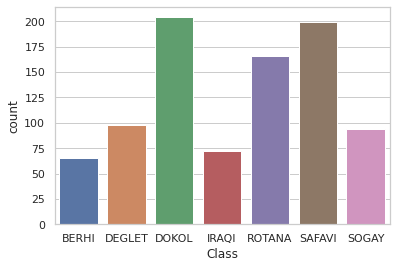

In [7]:
sns.set(style="whitegrid")
sns.countplot(x='Class', data=data)

In [8]:
grouped_data = data.groupby('Class').mean()
grouped_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BERHI,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,0.941309,0.879702,0.002029,0.001577,0.774640,0.994209,98.705897,96.525160,88.647135,27.072237,22.644206,28.080382,-0.071974,0.775535,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
DEGLET,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,0.870720,0.800431,0.002964,0.001914,0.642045,0.988186,119.161309,111.208723,109.275917,33.492430,30.369157,27.311899,-0.420807,-0.082849,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
DOKOL,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,0.876554,0.797999,0.003774,0.002432,0.637827,0.992729,123.634726,120.518030,112.782537,32.160052,26.965272,27.329317,-0.647980,-0.236757,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
IRAQI,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,0.936850,0.889800,0.001932,0.001536,0.792936,0.994546,80.474906,83.514899,82.111019,26.033911,24.849344,27.947636,0.707340,1.378558,1.072739,5.975487,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
ROTANA,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,0.860028,0.843006,0.002162,0.001558,0.711625,0.985272,123.434728,116.559758,112.656824,31.112716,28.585722,28.433014,-0.379780,-0.165621,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
SAFAVI,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,0.776164,0.740482,0.005716,0.001468,0.552141,0.989684,51.353037,58.013716,67.530432,21.525788,21.468804,20.018604,1.413760,2.055884,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
SOGAY,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,0.853460,0.798743,0.002671,0.001744,0.639159,0.975981,107.767832,95.619702,94.177524,33.608607,31.240621,28.600178,-0.116563,0.337452,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


We can compare some mean of features:

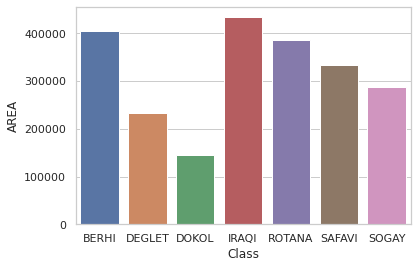

In [9]:
sns.barplot(data=grouped_data, x=grouped_data.index, y=grouped_data['AREA']);

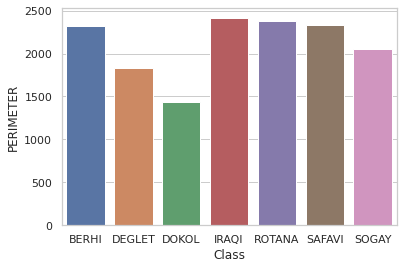

In [10]:
sns.barplot(data=grouped_data, x=grouped_data.index, y=grouped_data['PERIMETER']);

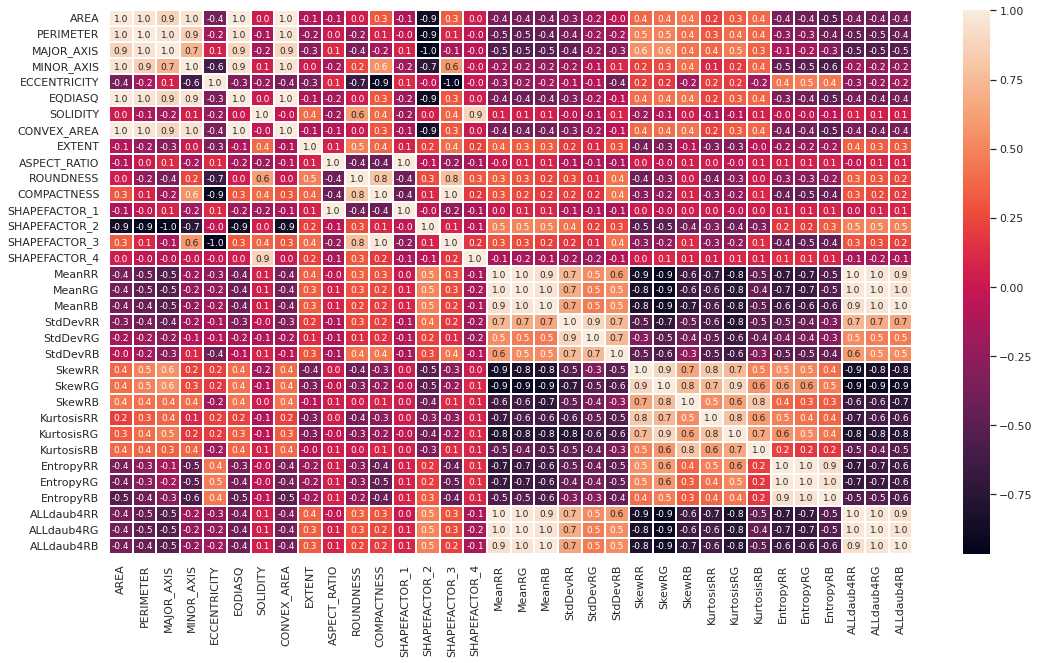

In [13]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.2, annot_kws={"fontsize":9}, fmt='.1f');

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = pd.DataFrame(data['Class'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True, stratify = y)

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_LE = label_encoder.fit_transform(y_train)
y_valid_LE = label_encoder.transform(y_valid)

y_train_LE = pd.DataFrame(y_train_LE, columns=y_train.columns)
y_valid_LE = pd.DataFrame(y_valid_LE, columns=y_valid.columns)

In [18]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_train, y_train_LE), columns=['MI Scores'],
                  index=X_train.columns)
corr = pd.DataFrame(X_train.corrwith(y_train_LE['Class']), columns=['Correlation'])
s_corr = pd.DataFrame(X_train.corrwith(y_train_LE['Class'], method='spearman'), columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MI Scores,Correlation,Spearman_Correlation
MINOR_AXIS,0.994465,-0.046804,-0.039850
SHAPEFACTOR_1,0.983733,0.061261,0.035722
EQDIASQ,0.897479,-0.063020,-0.062123
AREA,0.889226,-0.059410,-0.062123
CONVEX_AREA,0.874118,-0.058913,-0.064204
PERIMETER,0.798975,-0.050750,-0.060498
EntropyRR,0.752965,0.011760,0.003458
MAJOR_AXIS,0.746885,-0.057792,-0.077191
MeanRR,0.738001,0.034225,0.032204
ALLdaub4RR,0.735804,0.034222,0.032142


In [19]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train['Class']), y=y_train['Class'])
class_weights

array([1.97252747, 1.31501832, 0.62927257, 1.76847291, 0.77121375,
       0.64510332, 1.36761905])

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train_LE,          
          early_stopping_rounds=10,
          eval_set=[(X_valid, y_valid_LE)],
          verbose=0,
          feature_weights=class_weights)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:53:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_valid)
round(accuracy_score(y_pred, y_valid_LE) * 100, 2)

91.67

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid_LE, y_pred, average='weighted'),
    recall_score(y_valid_LE, y_pred, average='weighted'),
    f1_score(y_valid_LE, y_pred, average='weighted')))

Precision score is: 0.918014 
Recall score is: 0.916667 
f1 score is: 0.916709


In [24]:
from sklearn.metrics import classification_report

report_xgb = pd.DataFrame(classification_report(y_valid_LE, y_pred,
                                                output_dict=True,
                                                target_names=list(label_encoder.classes_)))
report_xgb

,BERHI,DEGLET,DOKOL,IRAQI,ROTANA,SAFAVI,SOGAY,accuracy,macro avg,weighted avg
precision,0.916667,0.727273,0.95122,0.866667,0.969697,1.0,0.823529,0.916667,0.893579,0.918014
recall,0.846154,0.800000,0.95122,0.928571,0.969697,1.0,0.736842,0.916667,0.890355,0.916667
f1-score,0.880000,0.761905,0.95122,0.896552,0.969697,1.0,0.777778,0.916667,0.891022,0.916709
support,13.000000,20.000000,41.00000,14.000000,33.000000,40.0,19.000000,0.916667,180.000000,180.000000


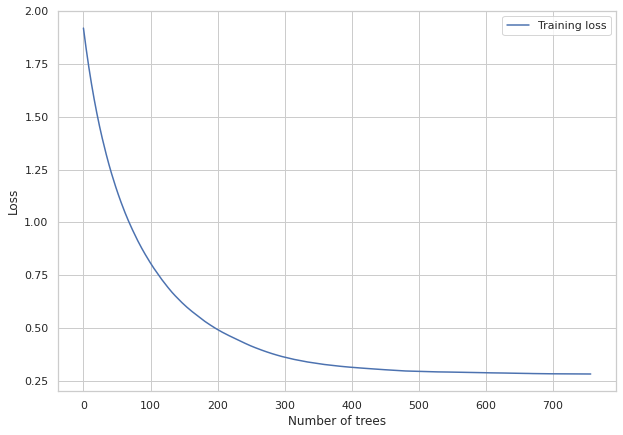

In [30]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

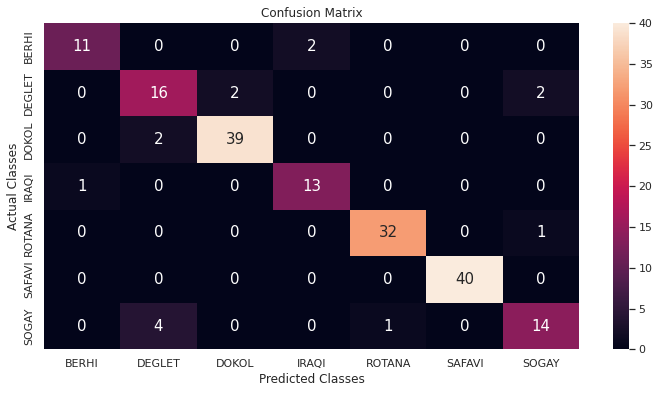

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid_LE, y_pred)

cm_dataframe = pd.DataFrame(cm, columns=list(label_encoder.classes_), index=list(label_encoder.classes_))
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set(title='Confusion Matrix');
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

Thanks for reading.